In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42)
n = 100
x = np.random.uniform(0, 10, n)
y = 0.5 * x + np.random.randn(n)

In [3]:
x, y

(array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
        1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
        0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
        1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
        6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
        7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
        6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
        8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
        1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
        6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456,
        9.69584628, 7.75132823, 9.39498942, 8.9482735 , 5.97899979,
        9.21874235, 0.88492502, 1.95982862, 0.45227289, 3.25330331,
        3.8867729 , 2.71349032, 8.28737509, 3.56753327, 2.8093451 ,
        5.42696083, 1.40924225, 8.02196981, 0.74550644, 9.86886937,
        7.72244769, 1.98715682, 0.05522117, 8.15

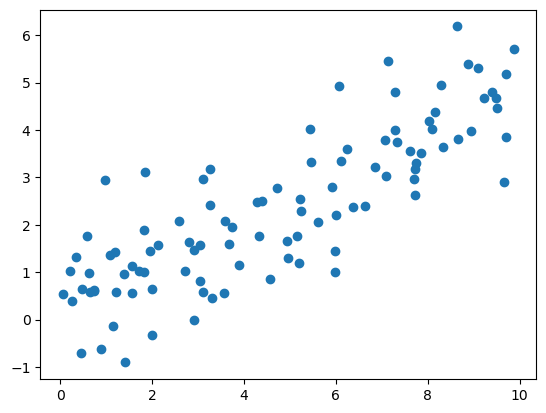

In [4]:
plt.scatter(x, y);

In [5]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
x_train.shape

(70, 1)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
print(f'Our regression model is y = {model.intercept_[0]:.3f} + {model.coef_[0,0]:.3f} X + \N{GREEK SMALL LETTER EPSILON}')

Our regression model is y = 0.118 + 0.453 X + ε


In [9]:
y_pred = model.predict(x_test)

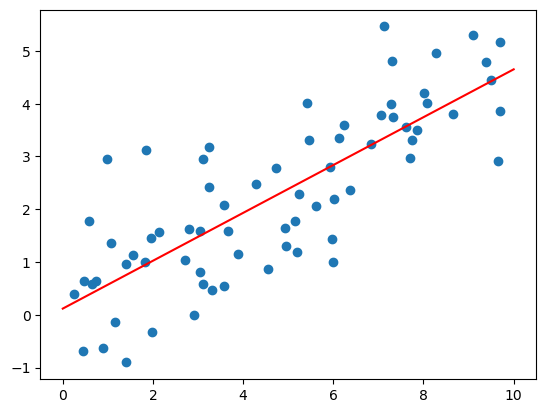

In [10]:
plt.scatter(x_train, y_train)
plt.plot(np.linspace(0, 10, n), model.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

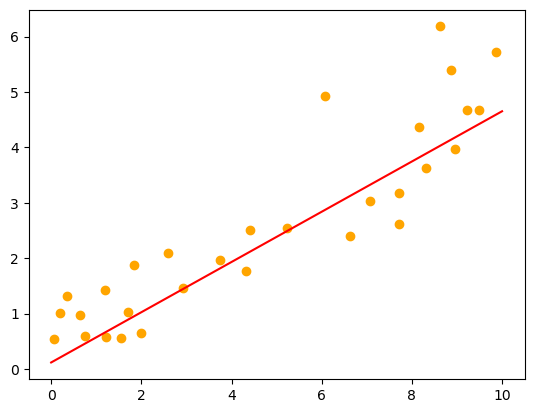

In [12]:
plt.scatter(x_test, y_test, c = 'orange')
plt.plot(np.linspace(0, 10, n), model.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

what about 2 variables?

In [14]:
np.random.seed(42)
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 10, n)
z = -0.5 * X1 + 1.5 * X2 + np.random.randn(n)

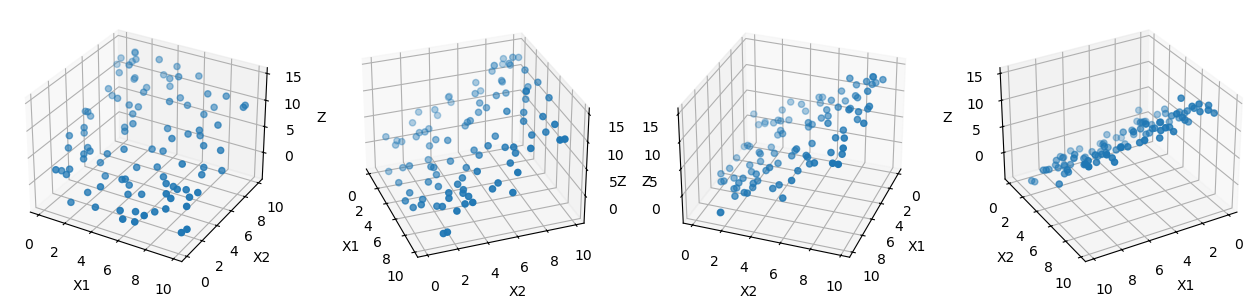

In [15]:
fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(X1, X2, z)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

In [16]:
X = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis = 1)

In [21]:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=42)

In [22]:
model2 = LinearRegression()
model2.fit(X_train, z_train)

LinearRegression()

In [65]:
print(f'Our regression model is y = {model2.intercept_:.3f} + {model2.coef_[0]:.3f} X1 + {model2.coef_[1]:.3f} X2 + \N{GREEK SMALL LETTER EPSILON}')

Our regression model is y = -0.279 + -0.517 X1 + 1.584 X2 + ε


In [20]:
z_pred = model2.predict(X_test)

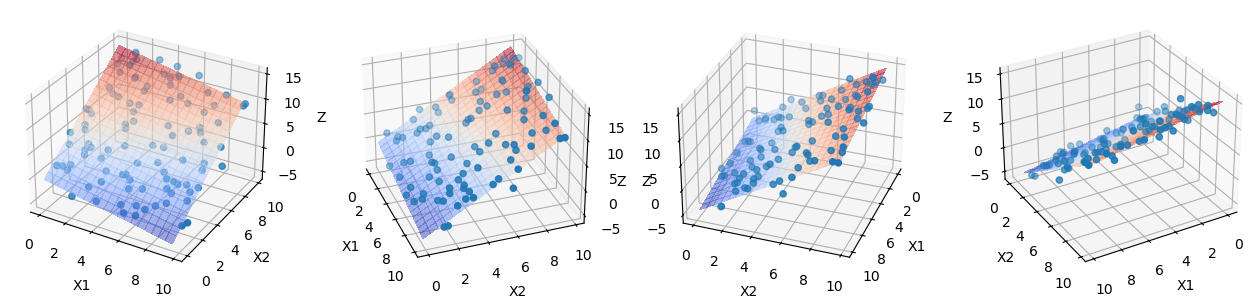

In [37]:
X1_train = X_train[:,0]
X2_train = X_train[:,1]

X1m = np.arange(0,10,0.5)
X2m = np.arange(0,10,0.5)
X1m, X2m = np.meshgrid(X1m, X2m)
zm = model2.intercept_ + model2.coef_[0] * X1m + model2.coef_[1] * X2m


fig = plt.figure(figsize=plt.figaspect(0.25))

for i, az in enumerate([-60, -20, 20, 60]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.plot_surface(X1m, X2m, zm, cmap = cm.coolwarm, antialiased = False, alpha = 0.5)
    ax.scatter(X1, X2, z)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=az)

plt.show()

In [33]:
model2.coef_

array([-0.51706959,  1.58409209])

Linear Regression is good at capturing linear relationships, between the target variable and features, but is not good at capturing non-linear features:

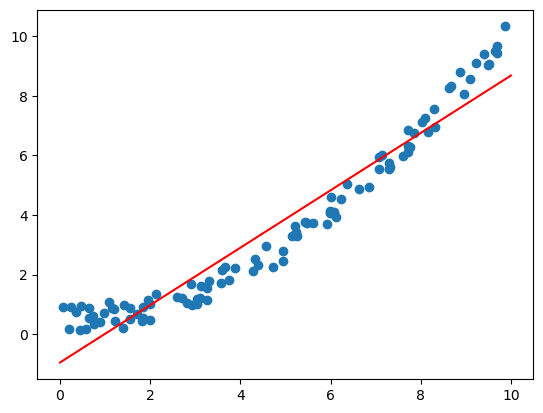

In [62]:
y2 = 0.1 * np.square(x.reshape(-1)) + np.random.rand(n)
model3 = LinearRegression()
model3.fit(x.reshape(-1,1), y2)

plt.scatter(x, y2)
plt.plot(np.linspace(0, 10, n), model3.predict(np.linspace(0, 10, n).reshape(-1,1)), c='r');

but you can make transformations to create linear features

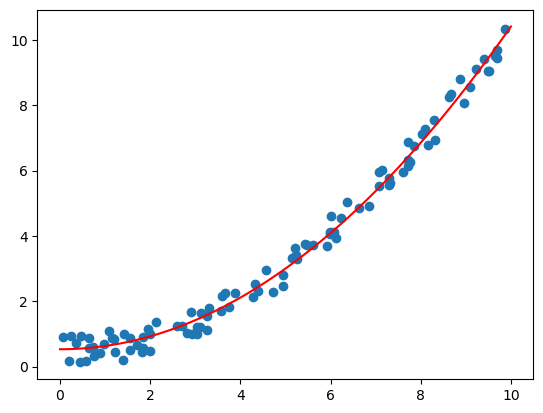

In [63]:
xsquared = np.square(x.reshape(-1))

model4 = LinearRegression()
model4.fit(xsquared.reshape(-1,1), y2)

plt.scatter(x, y2)
plt.plot(np.linspace(0, 10, n), model4.predict(np.square(np.linspace(0, 10, n).reshape(-1,1))), c='r');

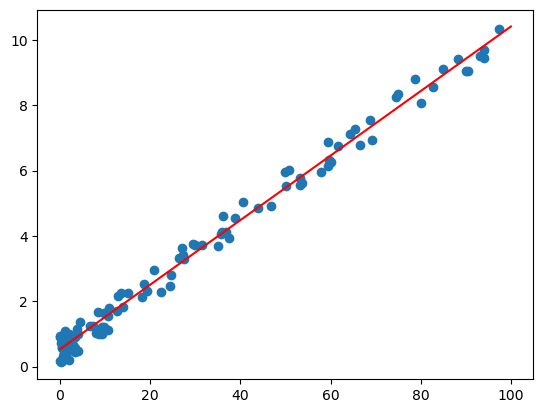

In [64]:
plt.scatter(xsquared, y2)
plt.plot(np.linspace(0, 100, n), model4.predict(np.linspace(0, 100, n).reshape(-1,1)), c='r');

what's the issue with this regression?

In [ ]:
X3 = np.linspace